#### Exercise 1
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [ ]:
# test

In [1]:
import pandas as pd

taxi_df = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")

taxi_df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 2
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [2]:
select_cols = ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']
# taxi_df['trip_distance'].idxmax()
# taxi_df.loc[taxi_df['trip_distance'].idxmax()]
taxi_df.loc[taxi_df['trip_distance'].idxmax(), select_cols]

fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object

#### Exercise 3
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [3]:
meteorite_df = pd.read_csv("data/Meteorite_Landings.csv")
# meteorite_df
meteorite_df.rename(columns={"mass (g)": "mass"}, inplace=True)
meteorite_df.drop(["reclat", "reclong", "GeoLocation"], axis=1, inplace=True)
meteorite_df.sort_values("mass", ascending=False, inplace=True)
meteorite_df

,name,id,nametype,recclass,mass,fall,year
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM
...,...,...,...,...,...,...,...
38282,Wei-hui-fu (a),24231,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38283,Wei-hui-fu (b),24232,Valid,Iron,NaN,Found,01/01/1931 12:00:00 AM
38285,Weiyuan,24233,Valid,Mesosiderite,NaN,Found,01/01/1978 12:00:00 AM
41472,Yamato 792768,28117,Valid,CM2,NaN,Found,01/01/1979 12:00:00 AM


#### Exercise 4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [4]:
meteorite_df["year_int"] = meteorite_df["year"].str.slice(6,10).fillna(-1).astype(int) # this can potentially mess up checking if meteorite observed before 1970
meteorite_df["year_int"] = meteorite_df["year"].str.slice(6,10).apply(pd.to_numeric, errors="coerce")
meteorite_df["b4_1970"] = meteorite_df["year_int"] < 1970
meteorite_df = meteorite_df.set_index("id").sort_index()
subset_df = meteorite_df.loc[10036:10040]
subset_df # id is not continuous, not entry with id 10040

,name,nametype,recclass,mass,fall,year,year_int,b4_1970
id,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,01/01/1967 12:00:00 AM,1967.0,True
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,01/01/1883 12:00:00 AM,1883.0,True
10038,Enshi,Valid,H5,8000.0,Fell,01/01/1974 12:00:00 AM,1974.0,False
10039,Ensisheim,Valid,LL6,127000.0,Fell,12/23/1491 12:00:00 AM,1491.0,True


#### Exercise 5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [5]:
taxi_df = pd.read_csv("data/2019_Yellow_Taxi_Trip_Data.csv")

taxi_df["tpep_dropoff_datetime"] = pd.to_datetime(taxi_df["tpep_dropoff_datetime"])


hourly_totals = taxi_df.resample("h", on="tpep_dropoff_datetime")[["trip_distance", "fare_amount", "tolls_amount", "tip_amount"]].sum()
hourly_totals.sort_values("tip_amount", ascending=False).head(5)

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


#### Exercise 6
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

<Axes: title={'center': 'travelers'}, xlabel='year'>

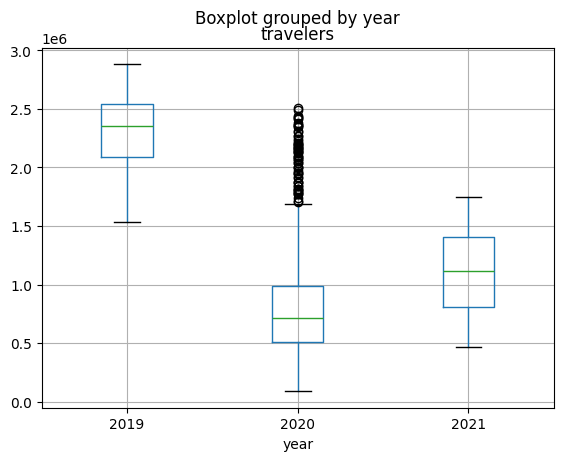

In [6]:
import matplotlib.pyplot as plt

tsa_df = pd.read_csv("data/tsa_melted_holiday_travel.csv")
tsa_df.boxplot(column="travelers", by="year")

# Not using the info provided in the hint but this implementation seems easier

#### Exercise 7
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

/tmp/ipykernel_5590/3456664133.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa2019_df["month"] = tsa2019_df["date"].dt.month
/tmp/ipykernel_5590/3456664133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa2019_df["day"] = tsa2019_df["date"].dt.day_name()


<Axes: xlabel='month', ylabel='day'>

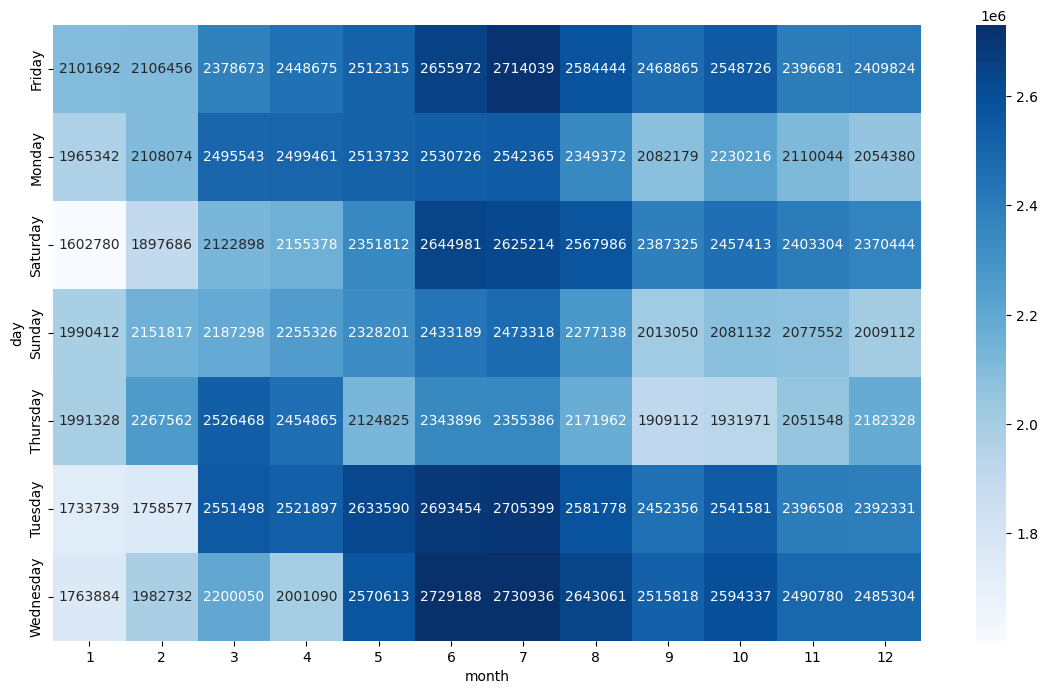

In [7]:
import seaborn as sns
tsa_df = pd.read_csv("data/tsa_melted_holiday_travel.csv")
tsa_df["date"] = pd.to_datetime(tsa_df["date"])
tsa2019_df = tsa_df[tsa_df["year"] == 2019]
tsa2019_df["month"] = tsa2019_df["date"].dt.month
tsa2019_df["day"] = tsa2019_df["date"].dt.day_name()

heatmap_data = tsa2019_df.pivot_table(index="day", columns="month", values="travelers", aggfunc="median")
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f")